In [1]:
#Expand notebook to take full screen width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

###
import sys
sys.path.insert(0,'../../src/')

%load_ext autoreload
%autoreload 2

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np
import pickle
import pandas as pd
sns.reset_orig()
matplotlib.rcParams.update({'font.size': 12})
from utils_write import stack_weights, cr_calc

In [2]:
def loadfile(mean, zmean, tau, temp, mixtures, model, data_size = "full",  scaling = False, model_save_dir = "", fn="", file = "res"):
    r = 30 if file == 'ures' else 50
    exp_name = "{}_m{}_zm{}_r{}_t{}_m{}_kdT{}_{}".format(model, mean, zmean, r, tau, int(mixtures), int(temp),data_size) + fn
    if (file=='res' or file == 'ures' or file == 'gmp'):
        with open(model_save_dir + '/mnist_retrain_layer_{}_{}.p'.format(file, exp_name),'rb') as f:
            file = pickle.load(f)
    if (file=='model'):
        file = torch.load(model_save_dir + '/mnist_retrain_layer_model_{}.m'.format(exp_name))
    return file

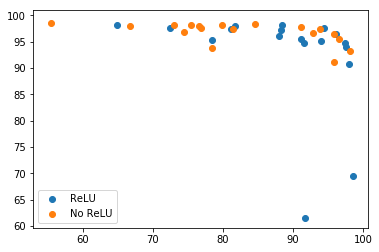

In [3]:
n_exp = pd.DataFrame(columns = ["layer", "tau", "act", "acc", "sp"])
idx=0
tau_list = [2e-6, 1e-6, 8e-7, 5e-7, 3e-7, 1e-7]
for tau in tau_list:
    res = loadfile(5000, 5000, tau, 1, 16, "LeNet_300_100FC1", "full", model_save_dir = "./files")
    n_exp.loc[idx] = ([1, tau, "n", res["prune_test"], res["sparsity"]])
    idx+=1
    
for tau in tau_list:
    res = loadfile(5000, 5000, tau, 1, 16, "LeNet_300_100FC1", "full", model_save_dir = "./mseha")
    n_exp.loc[idx] = ([1, tau, "a", res["prune_test"], res["sparsity"]])
    idx+=1
    
tau_list = [2e-4, 1e-4, 8e-5, 5e-5, 3e-5, 1e-5]
for tau in tau_list:
    res = loadfile(5000, 5000, tau, 1, 16, "LeNet_300_100FC2", "full", model_save_dir = "./files")
    n_exp.loc[idx] = ([2, tau, "n", res["prune_test"], res["sparsity"]])
    idx+=1
    
for tau in tau_list:
    res = loadfile(5000, 5000, tau, 1, 16, "LeNet_300_100FC2", "full", model_save_dir = "./mseha")
    n_exp.loc[idx] = ([2, tau, "a", res["prune_test"], res["sparsity"]])
    idx+=1
    
tau_list = [2e-2, 1e-2, 8e-3, 5e-3, 3e-3, 1e-3]
for tau in tau_list:
    res = loadfile(5000, 5000, tau, 1, 16, "LeNet_300_100FC3", "full", model_save_dir = "./files")
    n_exp.loc[idx] = ([3, tau, "n", res["prune_test"], res["sparsity"]])
    idx+=1
    
for tau in tau_list:
    res = loadfile(5000, 5000, tau, 1, 16, "LeNet_300_100FC3", "full", model_save_dir = "./mseha")
    n_exp.loc[idx] = ([3, tau, "a", res["prune_test"], res["sparsity"]])
    idx+=1
    
f = n_exp.query('act == \'a\'')
plt.scatter(f['sp'], f['acc'], label = "ReLU")
f= n_exp.query('act == \'n\'')
plt.scatter(f['sp'], f['acc'], label = "No ReLU")
plt.legend()

In [33]:
tau_df.max()

0.01

In [56]:
fin_exp = pd.DataFrame(columns = ["layer", "tau", "acc_d", "acc", "sp"])
idx=0
for acc in [88.3, 95.3, 96.3, 97.3]:
    for layer in [1,2,3]:
        sp_df = n_exp.query("act == \'n\' and acc > {} and layer == {}".format(acc, layer)).sort_values(by=['sp']).tail(1)['sp'].max()
        acc_df  = n_exp.query("act == \'n\' and acc > {} and layer == {}".format(acc, layer)).sort_values(by=['sp']).tail(1)['acc'].max()
        tau_df =n_exp.query("act == \'n\' and acc > {} and layer == {}".format(acc, layer)).sort_values(by=['sp']).tail(1)['tau'].max()
        fin_exp.loc[idx] = ([int(layer), tau_df, 98.3-acc, acc_df, sp_df])
        idx+=1

In [57]:
fin_exp['layer']

0     1.0
1     2.0
2     3.0
3     1.0
4     2.0
5     3.0
6     1.0
7     2.0
8     3.0
9     1.0
10    2.0
11    3.0
Name: layer, dtype: float64

In [67]:
fin_exp.pivot(index='acc_d', columns='layer', values=['acc','sp','tau'])

acc                       sp                                 tau  \
layer    1.0    2.0    3.0        1.0        2.0        3.0           1.0   
acc_d                                                                       
1.0    97.48  97.36  97.46  76.910403  93.900332  81.485149  5.000000e-07   
2.0    96.63  96.38  97.46  92.906157  95.867110  81.485149  1.000000e-06   
3.0    96.63  95.51  97.46  92.906157  96.667774  81.485149  1.000000e-06   
10.0   91.18  93.23  97.46  95.913376  98.212625  81.485149  2.000000e-06   

                      
layer      2.0   3.0  
acc_d                 
1.0    0.00005  0.01  
2.0    0.00008  0.01  
3.0    0.00010  0.01  
10.0   0.00020  0.01

0.0002
0.0001
8e-05
5e-05
3e-05
1e-05
0.0002
0.0001
8e-05
5e-05
3e-05
1e-05


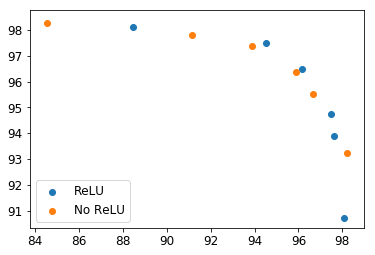

In [20]:

    
f = n_exp.query('act == \'a\'')
plt.scatter(f['sp'], f['acc'], label = "ReLU")
f= n_exp.query('act == \'n\'')
plt.scatter(f['sp'], f['acc'], label = "No ReLU")
plt.legend()

In [10]:
res['prune_test']

98.49